<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>
    
* [1. Libraries](#1)
* [2. Import Dataset](#2)
* [3. Data preparation.](#3)
     - [3.1 check duplicates](#3.1)
     - [3.2 Fill null values](#3.2)
     - [3.3 Drop unnecessary Columns](#3.3)
* [4. Data Visualization](#4)
    - [Q1- Which drink has the highest calories from the dataset?](#4.1)
    - [Q2. Highest Sugar Drink ?](#4.2)
    - [Q3. What are the average amount of fat in each category ?](#4.3)
    - [Q4. Which features affect on calories ?](#4.4)
* [5. Conclusion](#5)

    

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>2. libraries</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Import Dataset</b></font>

In [2]:
df_drinks= pd.read_csv('drinkMenu.csv')
df_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
df_drinks['Beverage_prep'].value_counts()

Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Grande                 7
Venti                  7
Tall                   7
Short                  4
Doppio                 1
Solo                   1
Name: Beverage_prep, dtype: int64

In [4]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
Beverage_category            242 non-null object
Beverage                     242 non-null object
Beverage_prep                242 non-null object
Calories                     242 non-null int64
 Total Fat (g)               242 non-null object
Trans Fat (g)                242 non-null float64
Saturated Fat (g)            242 non-null float64
 Sodium (mg)                 242 non-null int64
 Total Carbohydrates (g)     242 non-null int64
Cholesterol (mg)             242 non-null int64
 Dietary Fibre (g)           242 non-null int64
 Sugars (g)                  242 non-null int64
 Protein (g)                 242 non-null float64
Vitamin A (% DV)             242 non-null object
Vitamin C (% DV)             242 non-null object
 Calcium (% DV)              242 non-null object
Iron (% DV)                  242 non-null object
Caffeine (mg)                241 non-null object
dtypes: float64(

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Data preparation</b></font>

<a id="3.1"></a>
<font color="darkslateblue" size=+1.5><b>3.1 check duplicates</b></font>

In [5]:
df_drinks.duplicated().sum()

0

<a id="3.2"></a>
<font color="darkslateblue" size=+1.5><b>3.2 Fill null values</b></font>

In [6]:
df_drinks.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

* here we find a null value at Caffeine (mg) column
* let's dig deep into the data set to find the perfect way to fill this null value

In [7]:
df_drinks[df_drinks['Caffeine (mg)'].isnull() == True ]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [8]:
df_Iced_Brewed_Coffee=df_drinks[df_drinks['Beverage'] == 'Iced Brewed Coffee (With Milk & Classic Syrup)' ]
df_Iced_Brewed_Coffee.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,2%,0%,6%,0%,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1,0.1,0.0,0,20,17,0,17,2.0,2%,0%,6%,0%,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,4%,0%,8%,2%,90
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,4%,0%,8%,0%,125


In [9]:
df_Iced_Brewed_Coffee[df_Iced_Brewed_Coffee['Beverage_prep'] == '2% Milk']


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,4%,0%,8%,0%,125
164,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,180,2,1.0,0.1,10,55,36,0,36,4.0,6%,0%,10%,0%,170


* Here we find 3 Iced Brewed Coffee (With Milk & Classic Syrup) but with the same 2% milk but different calories and caffeine
* So we will use the ratio between calories and caffeine of the non null rows and get the the mean between the two results come from the two ratio
* The equation used
    - R1 <-- (calories of row index 158 * Caffeine of row index 164) /Calories of row index 164
    - R2 <-- (calories of row index 158 * Caffeine of row index 161) /Calories of row index 161
    - Mean(R1,R2)

In [10]:
resultfornull = round(np.mean([((90*180)/150),((90*125)/120)]))


In [11]:
df_drinks.fillna(str(resultfornull),inplace=True)

In [12]:
df_drinks.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

<a id="3.3"></a>
<font color="darkslateblue" size=+1.5><b>3.3 Drop unnecessary Columns</b></font>

* As we can see there are some columns that have space in the beginning and end of the name  so let's fix them

In [13]:
# edit columns name
columns = df_drinks.columns.str.strip()
columns = columns.str.rstrip()
df_drinks.set_axis(columns, axis=1, inplace=True)
df_drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

* There are some columns that have Percent of Daily value

In [14]:
obj_columns = ['Vitamin A (% DV)', 'Vitamin C (% DV)','Calcium (% DV)', 'Iron (% DV)']

In [15]:
df_edit_column=df_drinks[obj_columns]
df_edit_column.head()

,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
0,0%,0%,0%,0%
1,0%,0%,0%,0%
2,0%,0%,0%,0%
3,0%,0%,2%,0%
4,10%,0%,20%,0%


In [16]:
for col in df_edit_column.columns:
    df_edit_column[col]=df_edit_column[col].astype(str).apply(lambda x: x.replace('%', ''))
    df_edit_column[col]=df_edit_column[col].astype(float)
df_edit_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
Vitamin A (% DV)    242 non-null float64
Vitamin C (% DV)    242 non-null float64
Calcium (% DV)      242 non-null float64
Iron (% DV)         242 non-null float64
dtypes: float64(4)
memory usage: 7.7 KB


C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_drinks.drop(columns=obj_columns, inplace =True)


In [18]:
df_drinks=df_drinks.merge(df_edit_column, left_index=True, right_index=True)
df_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175,0.0,0.0,0.0,0.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260,0.0,0.0,0.0,0.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330,0.0,0.0,0.0,0.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410,0.0,0.0,2.0,0.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75,10.0,0.0,20.0,0.0


In [19]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
Beverage_category          242 non-null object
Beverage                   242 non-null object
Beverage_prep              242 non-null object
Calories                   242 non-null int64
Total Fat (g)              242 non-null object
Trans Fat (g)              242 non-null float64
Saturated Fat (g)          242 non-null float64
Sodium (mg)                242 non-null int64
Total Carbohydrates (g)    242 non-null int64
Cholesterol (mg)           242 non-null int64
Dietary Fibre (g)          242 non-null int64
Sugars (g)                 242 non-null int64
Protein (g)                242 non-null float64
Caffeine (mg)              242 non-null object
Vitamin A (% DV)           242 non-null float64
Vitamin C (% DV)           242 non-null float64
Calcium (% DV)             242 non-null float64
Iron (% DV)                242 non-null float64
dtypes: float64(7), int64(6), object(5)
memory u

* We found that Total fats and Caffeine datatypes are object let's convert it to float

In [20]:
df_drinks['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [21]:
df_drinks['Total Fat (g)']=df_drinks['Total Fat (g)'].astype(str).apply(lambda x: x.replace(' ', ''))
df_drinks['Total Fat (g)']=df_drinks['Total Fat (g)'].astype(float)

In [22]:
df_drinks['Total Fat (g)'].unique()

array([ 0.1,  3.5,  2.5,  0.2,  6. ,  4.5,  0.3,  7. ,  5. ,  0.4,  9. ,
        1.5,  4. ,  2. ,  8. ,  3. , 11. ,  0. ,  1. , 10. , 15. , 13. ,
        0.5, 32. ])

In [23]:
df_drinks['Caffeine (mg)'].unique()


array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', '101', '125',
       '170', '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [24]:
df_drinks[df_drinks['Caffeine (mg)']=='varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,varies,6.0,0.0,10.0,0.0
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,varies,6.0,0.0,10.0,0.0
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,varies,4.0,0.0,10.0,6.0
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,varies,10.0,0.0,20.0,0.0
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,varies,8.0,0.0,15.0,0.0
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,varies,6.0,0.0,20.0,8.0
136,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,varies,15.0,0.0,25.0,0.0
137,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,190,4.0,2.0,0.1,15,95,31,0,30,7.0,varies,10.0,0.0,25.0,0.0
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,varies,8.0,0.0,25.0,10.0
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,varies,15.0,0.0,30.0,0.0


In [25]:
df_drinks[df_drinks['Caffeine (mg)']=='Varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,Varies,0.0,0.0,0.0,0.0
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,Varies,0.0,0.0,0.0,0.0
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,Varies,0.0,0.0,0.0,0.0
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,Varies,0.0,0.0,0.0,0.0
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,Varies,0.0,0.0,0.0,0.0
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0.0,0.0,0.0,0,0,31,0,31,0.0,Varies,0.0,0.0,0.0,0.0
169,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Tall,100,0.0,0.0,0.0,0,0,25,0,24,0.1,Varies,0.0,10.0,0.0,0.0
170,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Grande,130,0.0,0.0,0.0,0,0,33,0,33,0.1,Varies,0.0,15.0,0.0,0.0
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0.0,0.0,0.0,0,0,49,0,49,0.1,Varies,0.0,20.0,0.0,0.0
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,Varies,10.0,15.0,20.0,0.0


* We found that there are Three Beverage_category which have value various in caffeine which are Tazo® Tea Drinks, Shaken Iced Beverages and Smoothies
* So, We will get mean of caffiene for each Beverage Category and replace various for each Beverage Category 

In [26]:
# Find mean value of caffiene for Tazo® Tea Drinks Category
df_Tazo_Tea=df_drinks[df_drinks['Beverage_category'] == 'Tazo® Tea Drinks']
df_Tazo_Tea=df_Tazo_Tea[df_Tazo_Tea['Caffeine (mg)'] != 'varies']
df_Tazo_Tea=df_Tazo_Tea[df_Tazo_Tea['Caffeine (mg)'] != 'Varies']
df_Tazo_Tea['Caffeine (mg)']=df_Tazo_Tea['Caffeine (mg)'].astype(float) 
Mean_of_Tazo_tea=round(df_Tazo_Tea['Caffeine (mg)'].mean())

In [27]:
# Find mean value of caffiene for Shaken Iced Category
df_Shaken_Iced =df_drinks[df_drinks['Beverage_category'] == 'Shaken Iced Beverages' ]
df_Shaken_Iced=df_Shaken_Iced[df_Shaken_Iced['Caffeine (mg)'] != 'Varies']
df_Shaken_Iced['Caffeine (mg)']=df_Shaken_Iced['Caffeine (mg)'].astype(float) 
Mean_Shaken_Iced=round(df_Shaken_Iced['Caffeine (mg)'].mean())

In [28]:
# Find mean value of caffiene for Smoothies Category
df_Smoothies=df_drinks[df_drinks['Beverage_category'] == 'Smoothies']
df_Smoothies=df_Smoothies[df_Smoothies['Caffeine (mg)'] != 'Varies']
df_Smoothies['Caffeine (mg)']=df_Smoothies['Caffeine (mg)'].astype(float)
Mean_df_Smoothies=round(df_Smoothies['Caffeine (mg)'].mean())

In [29]:
# Replace various or Various with the specific mean for each category
for i in range(len(df_drinks)):
    if df_drinks['Beverage_category'].iloc[i] == 'Smoothies' and (df_drinks['Caffeine (mg)'].iloc[i] == 'Varies' or 
                                                         df_drinks['Caffeine (mg)'].iloc[i] == 'varies'):

        df_drinks['Caffeine (mg)'].iloc[i] = str(Mean_df_Smoothies)
    elif df_drinks['Beverage_category'].iloc[i] == 'Shaken Iced Beverages' and (df_drinks['Caffeine (mg)'].iloc[i] == 'Varies' or 
                                                         df_drinks['Caffeine (mg)'].iloc[i] == 'varies'):

        df_drinks['Caffeine (mg)'].iloc[i] = str(Mean_Shaken_Iced)
    elif df_drinks['Beverage_category'].iloc[i] == 'Tazo® Tea Drinks' and (df_drinks['Caffeine (mg)'].iloc[i] == 'Varies' or 
                                                         df_drinks['Caffeine (mg)'].iloc[i] == 'varies'):

        df_drinks['Caffeine (mg)'].iloc[i] = str(Mean_of_Tazo_tea)    

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
df_drinks['Caffeine (mg)'].unique()


array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', '50', '70', '120', '55', '80',
       '110', '165', '235', '90', '101', '125', '170', '137', '6', '15',
       '130', '140', '100', '145', '65', '105'], dtype=object)

In [31]:
df_drinks['Caffeine (mg)']=df_drinks['Caffeine (mg)'].astype(float)

In [32]:
df_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
Beverage_category          242 non-null object
Beverage                   242 non-null object
Beverage_prep              242 non-null object
Calories                   242 non-null int64
Total Fat (g)              242 non-null float64
Trans Fat (g)              242 non-null float64
Saturated Fat (g)          242 non-null float64
Sodium (mg)                242 non-null int64
Total Carbohydrates (g)    242 non-null int64
Cholesterol (mg)           242 non-null int64
Dietary Fibre (g)          242 non-null int64
Sugars (g)                 242 non-null int64
Protein (g)                242 non-null float64
Caffeine (mg)              242 non-null float64
Vitamin A (% DV)           242 non-null float64
Vitamin C (% DV)           242 non-null float64
Calcium (% DV)             242 non-null float64
Iron (% DV)                242 non-null float64
dtypes: float64(9), int64(6), object(3)
memory

* I prefered not to drop any columns from the dataset to be using during the visualization process


In [45]:
df_drinks.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,3.023967,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,87.590909,9.830579,3.648760,20.756198,7.446281
std,102.863303,3.488167,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,62.975741,8.097962,14.421794,14.542343,10.486467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,50.000000,4.000000,0.000000,10.000000,0.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,75.000000,8.000000,0.000000,20.000000,2.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,137.000000,15.000000,0.000000,30.000000,10.000000
max,510.000000,32.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000,50.000000,100.000000,60.000000,50.000000


<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Data Visualization</b></font>

<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>Q1- Which drink has the highest calories from the dataset?</b></font>

* So let's use column Beverage and make group by this column to get mean of calories for each drink

In [33]:
df_calories_drinks=df_drinks.groupby(by='Beverage',as_index = False).agg({'Calories' : 'mean'
                                                                                          ,'Beverage_prep' : 'count'} )
df_calories_drinks = df_calories_drinks.sort_values(by='Calories', ascending=False)

In [34]:
df_calories_drinks.head(10)

,Beverage,Calories,Beverage_prep
32,White Chocolate Mocha (Without Whipped Cream),330.000000,12
16,Java Chip (Without Whipped Cream),327.777778,9
0,Banana Chocolate Smoothie,290.000000,3
24,Strawberry Banana Smoothie,290.000000,3
28,Tazo® Green Tea Latte,275.000000,12
18,Mocha (Without Whipped Cream),272.222222,9
7,Caramel (Without Whipped Cream),268.888889,9
19,Orange Mango Banana Smoothie,266.666667,3
23,Strawberries & Crème (Without Whipped Cream),248.888889,9
8,Caramel Apple Spice (Without Whipped Cream),247.500000,4


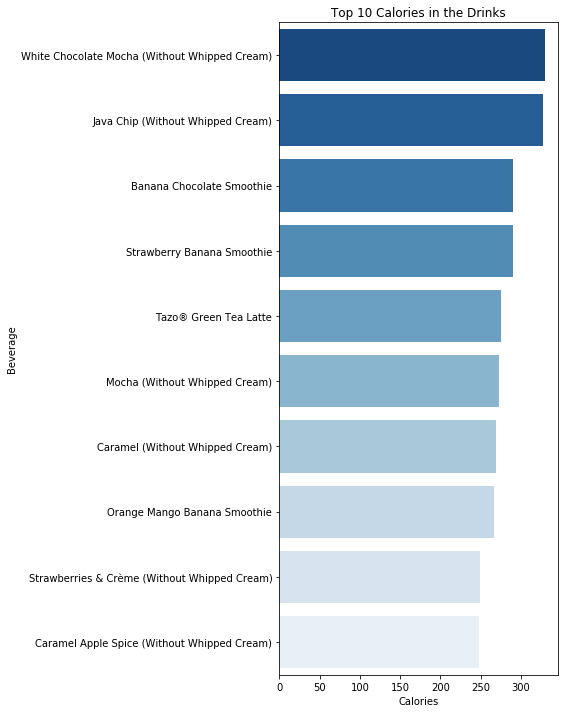

In [35]:
plt.figure(figsize=(5,12))
sns.barplot( y='Beverage',x='Calories', data=df_calories_drinks.sort_values(by='Calories', ascending=False).head(10),
        palette='Blues_r')
plt.title('Top 10 Calories in the Drinks')
plt.show();

* **White Chocolate Mocha (Without Whipped Cream)** has highest calories

In [51]:
df_drinks['Beverage_with_preparation'] = df_drinks['Beverage']+df_drinks['Beverage_prep']


 * Here we want to take in considration also the preparation of the drinks as it can increase amount of calories

In [52]:
df_calories_drinkswithprep=df_drinks.groupby(by='Beverage_with_preparation',as_index = False).agg({'Calories' : 'mean'
                                                                                          ,'Beverage_prep' : 'count'} )
df_calories_drinkswithprep = df_calories_drinkswithprep.sort_values(by='Calories', ascending=False)
df_calories_drinkswithprep.head()

,Beverage_with_preparation,Calories,Beverage_prep
148,White Chocolate Mocha (Without Whipped Cream)V...,450.0,1
71,Java Chip (Without Whipped Cream)Venti Nonfat ...,420.0,1
128,Tazo® Green Tea LatteVenti Nonfat Milk,370.0,1
37,Caramel Apple Spice (Without Whipped Cream)Venti,360.0,1
143,White Chocolate Mocha (Without Whipped Cream)2...,355.0,4


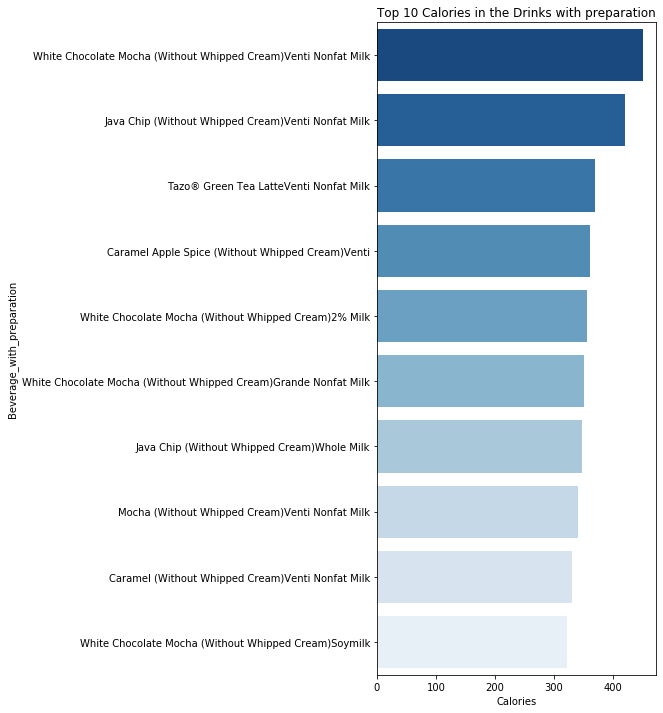

In [54]:
plt.figure(figsize=(5,12))
sns.barplot( y='Beverage_with_preparation',x='Calories', data=df_calories_drinkswithprep.sort_values(by='Calories', ascending=False).head(10),
        palette='Blues_r')
plt.title('Top 10 Calories in the Drinks with preparation')
plt.show();

**White Chocolate Mocha (Without Whipped Cream) Venti Nonfat Milk** has highest calories

<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>Q2. Highest Sugar Drink ?</b></font>

In [36]:
df_sugar_drinks=df_drinks.groupby(by='Beverage',as_index = False).agg({'Sugars (g)' : 'mean'
                                                                                          ,'Beverage_prep' : 'count'} )
df_sugar_drinks = df_sugar_drinks.sort_values(by='Sugars (g)', ascending=False)
df_sugar_drinks.head()

,Beverage,Sugars (g),Beverage_prep
16,Java Chip (Without Whipped Cream),62.444444,9
7,Caramel (Without Whipped Cream),58.000000,9
8,Caramel Apple Spice (Without Whipped Cream),57.500000,4
18,Mocha (Without Whipped Cream),57.111111,9
23,Strawberries & Crème (Without Whipped Cream),51.555556,9


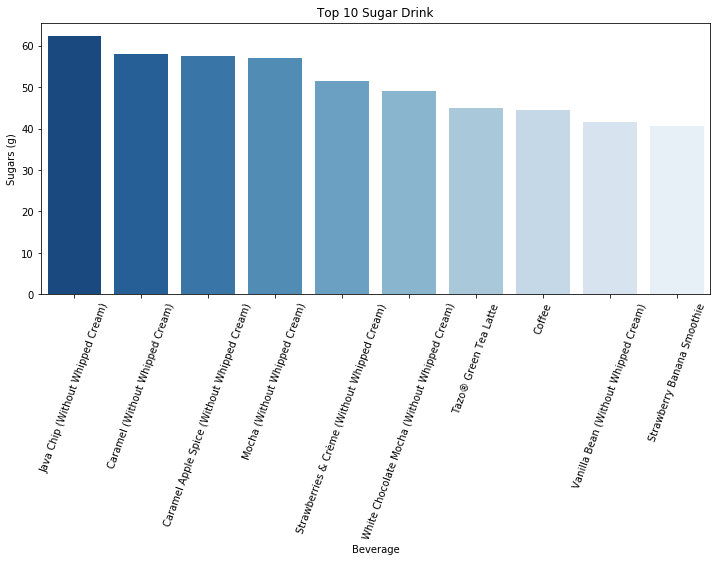

In [37]:
plt.figure(figsize=(12,5))
sns.barplot( x='Beverage',y='Sugars (g)', data=df_sugar_drinks.sort_values(by='Sugars (g)', ascending=False).head(10),
        palette='Blues_r')
plt.xticks(rotation=70)
plt.title('Top 10 Sugar Drinks')
plt.show();

* **Java Chip (Without Whipped Cream)** has highest sugar amount

In [55]:
df_sugar_drinks_withprep=df_drinks.groupby(by='Beverage_with_preparation',as_index = False).agg({'Sugars (g)' : 'mean'
                                                                                          ,'Beverage_prep' : 'count'} )
df_sugar_drinks_withprep = df_sugar_drinks_withprep.sort_values(by='Sugars (g)', ascending=False)
df_sugar_drinks_withprep.head()

,Beverage_with_preparation,Sugars (g),Beverage_prep
71,Java Chip (Without Whipped Cream)Venti Nonfat ...,84.0,1
37,Caramel Apple Spice (Without Whipped Cream)Venti,83.0,1
32,Caramel (Without Whipped Cream)Venti Nonfat Milk,77.0,1
79,Mocha (Without Whipped Cream)Venti Nonfat Milk,76.0,1
148,White Chocolate Mocha (Without Whipped Cream)V...,74.0,1


 * Here we want to take in considration also the preparation of the drinks as it can increase amount of sugar

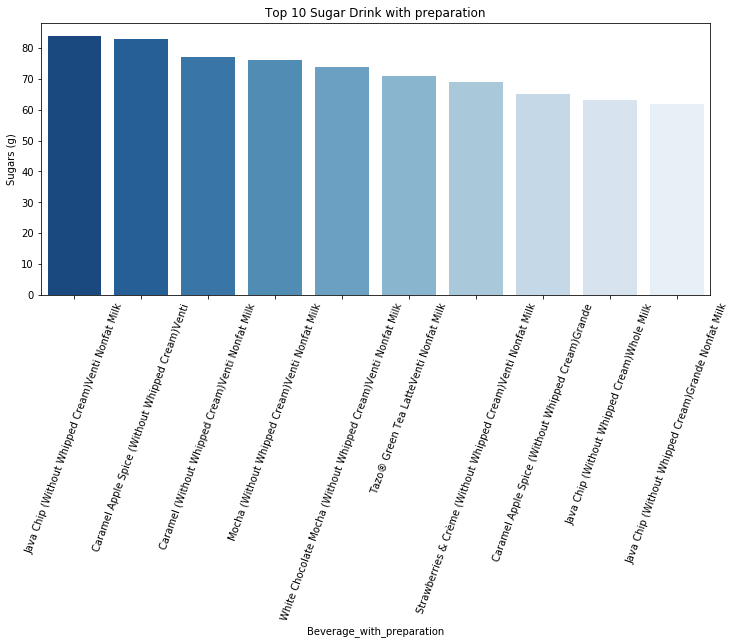

In [56]:
plt.figure(figsize=(12,5))
sns.barplot( x='Beverage_with_preparation',y='Sugars (g)', data=df_sugar_drinks_withprep.sort_values(by='Sugars (g)', ascending=False).head(10),
        palette='Blues_r')
plt.xticks(rotation=70)
plt.title('Top 10 Sugar Drinks with preparation')
plt.show();

* **Java Chip (Without Whipped Cream) Venti Nonfat Milk** has highest sugar amount

<a id="4.3"></a>
<font color="dimgrey" size=+2.0><b>Q3. What are the average amount of fat in each category ?</b></font>

In [42]:
df_amount_of_fats=df_drinks.groupby(by='Beverage_category',as_index = False).agg({'Total Fat (g)' : 'mean'
                                                                                          } )
df_amount_of_fats = df_amount_of_fats.sort_values(by='Total Fat (g)', ascending=False)
df_amount_of_fats

,Beverage_category,Total Fat (g)
6,Signature Espresso Drinks,5.275000
3,Frappuccino® Blended Crème,4.169231
0,Classic Espresso Drinks,3.127586
2,Frappuccino® Blended Coffee,3.002778
8,Tazo® Tea Drinks,2.540385
7,Smoothies,2.333333
4,Frappuccino® Light Blended Coffee,1.258333
5,Shaken Iced Beverages,0.472222
1,Coffee,0.100000


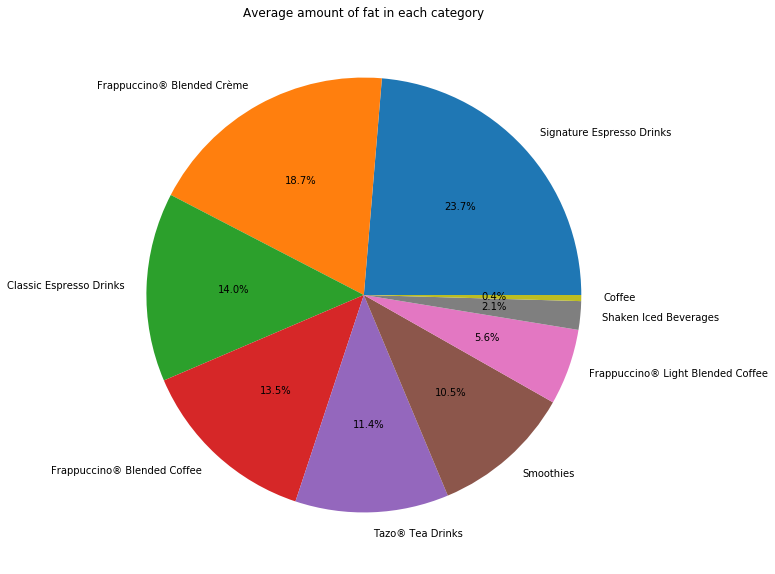

In [68]:
plt.figure(figsize=(10,10))
plt.pie(df_amount_of_fats['Total Fat (g)'] ,labels = df_amount_of_fats['Beverage_category'],autopct = '%1.1f%%' )
plt.title('Average amount of fat in each category')
plt.show();

<a id="4.4"></a>
<font color="dimgrey" size=+2.0><b>Q4. Which features affect on calories ?</b></font>

In [58]:
df_drinks.corr()[['Calories']].sort_values(by = 'Calories' , ascending = False )

,Calories
Calories,1.000000
Cholesterol (mg),0.940034
Sugars (g),0.909675
Total Carbohydrates (g),0.795037
Trans Fat (g),0.642818
Protein (g),0.578453
Total Fat (g),0.576144
Calcium (% DV),0.518720
Iron (% DV),0.427153
Vitamin A (% DV),0.406820


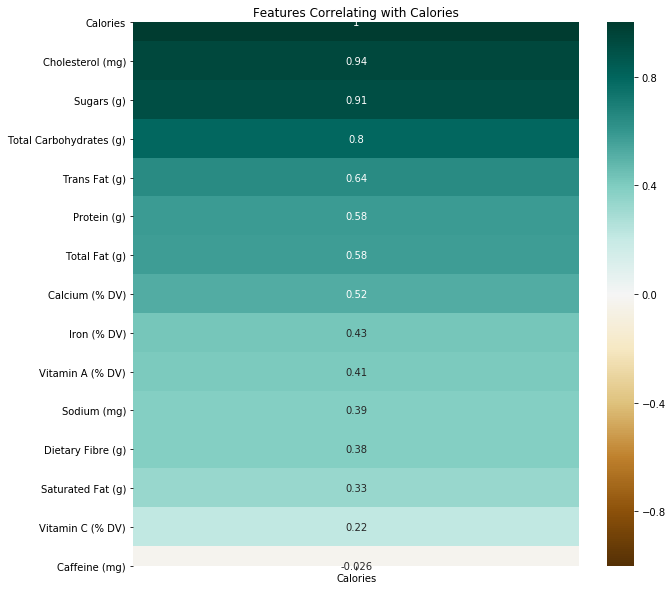

In [67]:
plt.figure(figsize=(10,10))
hmap = sns.heatmap(df_drinks.corr()[['Calories']].sort_values(by='Calories', ascending=False), vmin=-1,vmax=1,annot=True, cmap='BrBG')
plt.title('Features Correlating with Calories');

* Cholesterol, Sugars and Carbohydrates has the highest correlation to calories of the drinks

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Conclusion</b></font>

* There are 242 type of drinks with 18 features as Calories, Trans Fat, Cholesterol, Beverage Preparation Type, Beverage Category and so on. 
* if You are on diet you should avoid high calories drink like White Chocolate Mocha (Without Whipped Cream) ang high sugar drink as Java Chip (Without Whipped Cream)
* For your health avoid drinks with high Cholesterol, Sugars and Carbohydrates
* Signature Espresso Drinks are the highest category that have high average amount of fats